### ДЗ к уроку №2 "Keras" и распознавание Fashion_MNIST
Используем набор примеров fashion-MNIST

    Опишите - какой результата получен в нейросети в зависимости от:
        числа нейронов в слое(для 2-хслойной сети),
        числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
        фиксируйте для тренировочного и тестового набора метрики accuracy.

    Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

    Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

    Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность)


In [1]:
# The full neural network code!
###############################
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
print('keras_version =',keras.__version__)

keras_version = 2.5.0


In [2]:
# loading the dataset and put in in train and test
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

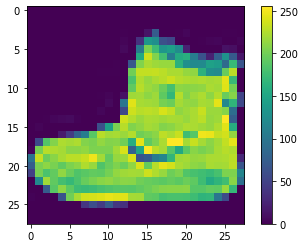

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Посмотрим первые 25 изображений:

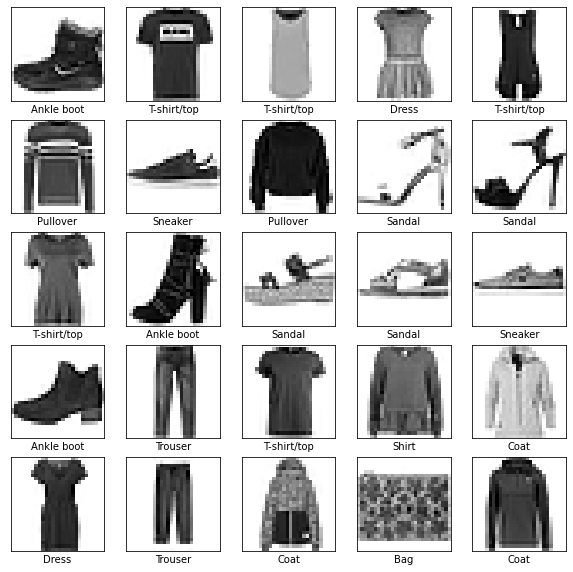

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

## Построение модели

Собираем сеть по слоям через .add()

In [11]:
model = Sequential(name='my_model')
model.add( Dense(128, activation='relu', input_shape=(784,))) # поносвязный слой из 128 нейронов с активацией ReLU 
for k in range(2):
    model.add(Dense(10+(10-k)*20, activation='tanh')) # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh
model.add(Dense(10, activation='softmax')) # выходной слой из 10 нейронов (сколько классов, столько нейронов)
                                           # + активация softmax

In [12]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 210)               27090     
_________________________________________________________________
dense_2 (Dense)              (None, 190)               40090     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1910      
Total params: 169,570
Trainable params: 169,570
Non-trainable params: 0
_________________________________________________________________


Компилируем сеть с оптимизатором , функцией потерь и метрикой:

In [13]:
model.compile(
  optimizer='adam', # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
) 

Оптимизаторы:

    SGD() (с или без моментум)
    RMSprop()
    Adam()
    Adagrad() …

Функции потерь:

    CategoricalCrossentropy()
    SparseCategoricalCrossentropy()
    BinaryCrossentropy()
    MeanSquaredError()
    KLDivergence()
    CosineSimilarity() …

Метрики:

    CategoricalAccuracy()
    SparseCategoricalAccuracy()
    BinaryAccuracy()
    AUC()
    Precision()
    Recall() …

In [14]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [15]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [16]:
y_train[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Тренировка модели

In [17]:
# Train the model.
hh = model.fit(  
  train_images[:,:],
  y_train[:,:],
  epochs=15,
  batch_size=128, validation_split=0.2
)

# Evaluate the model.
model.evaluate( 
  test_images,
  y_test
)

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

# Check our predictions against the ground truths.
print(test_labels[:5]) # [9, 2, 1, 1, 6]

Epoch 1/15
375/375 [==============================] - 12s 6ms/step - loss: 0.6780 - accuracy: 0.7561 - val_loss: 0.4262 - val_accuracy: 0.8431
Epoch 2/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3779 - accuracy: 0.8623 - val_loss: 0.3792 - val_accuracy: 0.8580
Epoch 3/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3455 - accuracy: 0.8714 - val_loss: 0.3327 - val_accuracy: 0.8811
Epoch 4/15
375/375 [==============================] - 2s 4ms/step - loss: 0.3047 - accuracy: 0.8868 - val_loss: 0.3418 - val_accuracy: 0.8724
Epoch 5/15
375/375 [==============================] - 2s 4ms/step - loss: 0.2884 - accuracy: 0.8916 - val_loss: 0.3252 - val_accuracy: 0.8827
Epoch 6/15
375/375 [==============================] - 2s 4ms/step - loss: 0.2690 - accuracy: 0.8986 - val_loss: 0.3150 - val_accuracy: 0.8853
Epoch 7/15
375/375 [==============================] - 2s 4ms/step - loss: 0.2603 - accuracy: 0.9016 - val_loss: 0.3232 - val_accuracy: 0.8848
Epoch

Сохраним модель на диск

In [18]:
# сохранить веса модели.
model.save_weights('model.h5')

# загрузить веса модели:
# model.load_weights('model.h5')


Покажем как выглядит кривая обучения

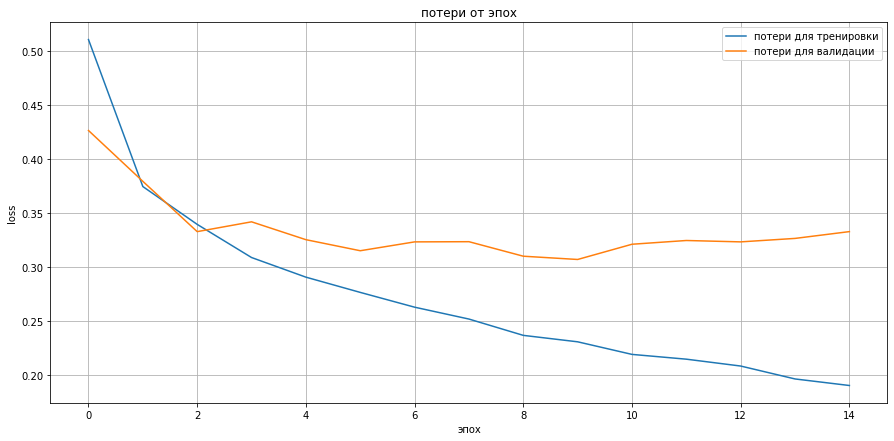

In [19]:
plt.figure(figsize=(15,7))
plt.plot(hh.history['loss'], label = 'потери для тренировки')
plt.plot(hh.history['val_loss'], label = 'потери для валидации')
plt.xlabel('эпох')
plt.ylabel('loss')
plt.legend()
plt.grid('On')
plt.title('потери от эпох')
plt.show()

Вывод: максимальное количество шагов можно делать 10

### Эксперимент с разными количествами нейронов в слоях начальной модели:
Посмотрим как получается при изменении количества нейронов в слоях: 20, 200, 2000

Epoch 1/15
47/47 [==============================] - 1s 17ms/step - loss: 1.4374 - accuracy: 0.6440 - val_loss: 1.1352 - val_accuracy: 0.7714
Epoch 2/15
47/47 [==============================] - 1s 11ms/step - loss: 1.0061 - accuracy: 0.7950 - val_loss: 0.8948 - val_accuracy: 0.8127
Epoch 3/15
47/47 [==============================] - 0s 10ms/step - loss: 0.8152 - accuracy: 0.8239 - val_loss: 0.7457 - val_accuracy: 0.8348
Epoch 4/15
47/47 [==============================] - 1s 11ms/step - loss: 0.6898 - accuracy: 0.8405 - val_loss: 0.6464 - val_accuracy: 0.8452
Epoch 5/15
47/47 [==============================] - 1s 11ms/step - loss: 0.6053 - accuracy: 0.8506 - val_loss: 0.5761 - val_accuracy: 0.8520
Epoch 6/15
47/47 [==============================] - 0s 10ms/step - loss: 0.5416 - accuracy: 0.8609 - val_loss: 0.5262 - val_accuracy: 0.8576
Epoch 7/15
47/47 [==============================] - 0s 10ms/step - loss: 0.4929 - accuracy: 0.8684 - val_loss: 0.4878 - val_accuracy: 0.8640
Epoch 8/15
47

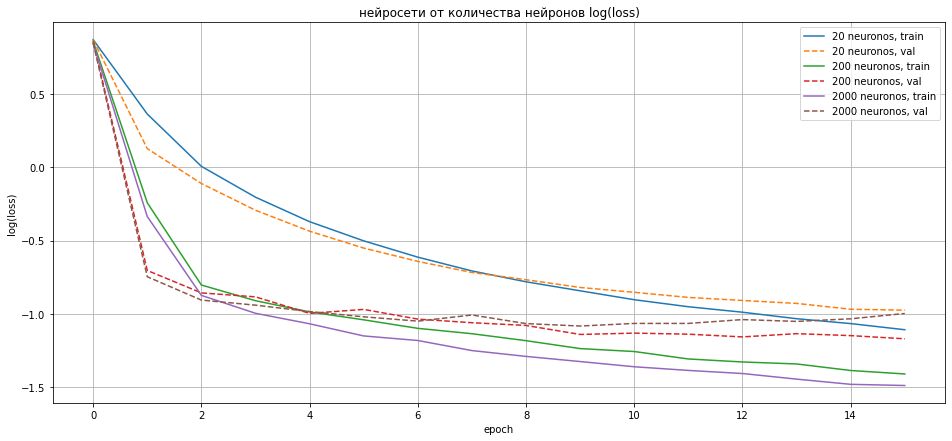

In [33]:
# создаем модели
model1 = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(20, activation='tanh'),
                      Dense(10, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
model2 = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(200, activation='tanh'),
                      Dense(190, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
model3 = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(2000, activation='tanh'),
                      Dense(1990, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])


# сохраняем их веса (это начальная точка) model.save_weights('model.h5')
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

i=1
# будем менять модели и смотреть результат
for i_model in [model1, model2, model3]:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = i_model
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model' + str(i) + '.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer='Adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=1024, validation_split=0.2
      )
    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = str((10**(i-1)) * 20) +' neuronos, train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str((10**(i-1)) * 20) + ' neuronos, val')
    i += 1
plt.legend()
plt.grid('On')

plt.title('нейросети от количества нейронов log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

#### Вывод: лучший результат показала сетка с 200 неронами на 1 скрытом слое, уже на 11 шаге она обходит сетку с 2000 нейронами.
Интересно, может ли сетка с 20 нейронами в 1 скрытом слое догнать сетку с 200 нейронами, проверим:

Epoch 1/150
47/47 [==============================] - 1s 17ms/step - loss: 1.5654 - accuracy: 0.6027 - val_loss: 1.2710 - val_accuracy: 0.7628
Epoch 2/150
47/47 [==============================] - 1s 11ms/step - loss: 1.1349 - accuracy: 0.7910 - val_loss: 1.0113 - val_accuracy: 0.8122
Epoch 3/150
47/47 [==============================] - 0s 10ms/step - loss: 0.9266 - accuracy: 0.8256 - val_loss: 0.8497 - val_accuracy: 0.8313
Epoch 4/150
47/47 [==============================] - 1s 17ms/step - loss: 0.7843 - accuracy: 0.8423 - val_loss: 0.7344 - val_accuracy: 0.8428
Epoch 5/150
47/47 [==============================] - 0s 10ms/step - loss: 0.6817 - accuracy: 0.8514 - val_loss: 0.6516 - val_accuracy: 0.8485
Epoch 6/150
47/47 [==============================] - 0s 10ms/step - loss: 0.6046 - accuracy: 0.8610 - val_loss: 0.5932 - val_accuracy: 0.8511
Epoch 7/150
47/47 [==============================] - 0s 10ms/step - loss: 0.5470 - accuracy: 0.8666 - val_loss: 0.5405 - val_accuracy: 0.8613
Epoch 

47/47 [==============================] - 0s 10ms/step - loss: 0.0556 - accuracy: 0.9837 - val_loss: 0.4617 - val_accuracy: 0.8853
Epoch 116/150
47/47 [==============================] - 0s 10ms/step - loss: 0.0626 - accuracy: 0.9802 - val_loss: 0.4657 - val_accuracy: 0.8864
Epoch 117/150
47/47 [==============================] - 0s 10ms/step - loss: 0.0545 - accuracy: 0.9842 - val_loss: 0.4622 - val_accuracy: 0.8880
Epoch 118/150
47/47 [==============================] - 0s 9ms/step - loss: 0.0524 - accuracy: 0.9849 - val_loss: 0.4743 - val_accuracy: 0.8859
Epoch 119/150
47/47 [==============================] - 0s 10ms/step - loss: 0.0540 - accuracy: 0.9838 - val_loss: 0.4713 - val_accuracy: 0.8852
Epoch 120/150
47/47 [==============================] - 0s 9ms/step - loss: 0.0526 - accuracy: 0.9848 - val_loss: 0.4953 - val_accuracy: 0.8842
Epoch 121/150
47/47 [==============================] - 0s 10ms/step - loss: 0.0547 - accuracy: 0.9837 - val_loss: 0.4756 - val_accuracy: 0.8864
Epoch 12

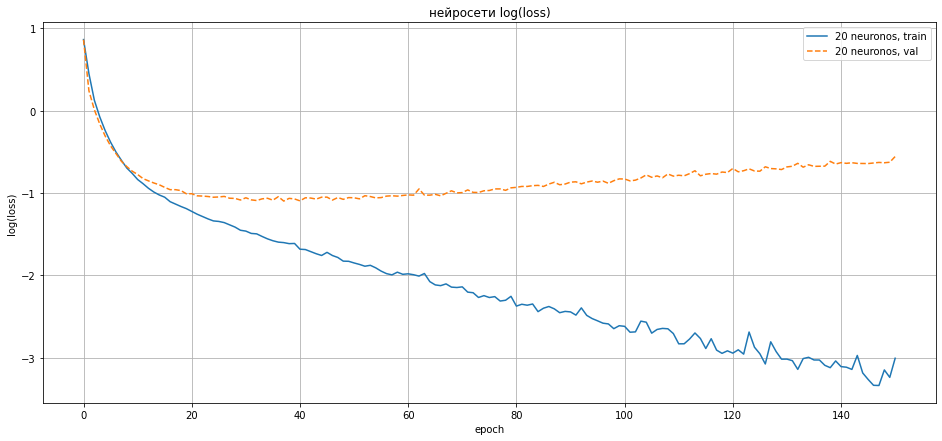

In [34]:
# создаем модели
model1 = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(20, activation='tanh'),
                      Dense(10, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

# сохраняем их веса (это начальная точка) model.save_weights('model.h5')
model1.save_weights('model1.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 150
# вектор для выводв результатов
epoch = np.arange(epochs+1)

i=1
# будем менять модели и смотреть результат
for i_model in [model1]:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = i_model
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model' + str(i) + '.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer='Adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=1024, validation_split=0.2
      )
    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = str((10**(i-1)) * 20) +' neuronos, train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str((10**(i-1)) * 20) + ' neuronos, val')
    i += 1
plt.legend()
plt.grid('On')

plt.title('нейросети log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

#### Вывод: нет, не может. С 20-тью нейронами в 1-м слое сеть хорошо обучается до 40 шага, затем идёт переобучение, но в любом случае, сеть не дотягивает до уровня сети с 200 нейронами в 1-м скрытом слое - слишком проста, хотя и показывает неплохие результаты.

### Эксперимент с разными количествами слоёв начальной модели:
Посмотрим как получается при изменении количества слоёв: 2, 4, 8

Epoch 1/15
47/47 [==============================] - 1s 20ms/step - loss: 0.7764 - accuracy: 0.7325 - val_loss: 0.4845 - val_accuracy: 0.8227
Epoch 2/15
47/47 [==============================] - 1s 15ms/step - loss: 0.4473 - accuracy: 0.8378 - val_loss: 0.4168 - val_accuracy: 0.8485
Epoch 3/15
47/47 [==============================] - 1s 15ms/step - loss: 0.3991 - accuracy: 0.8559 - val_loss: 0.4051 - val_accuracy: 0.8541
Epoch 4/15
47/47 [==============================] - 1s 15ms/step - loss: 0.3658 - accuracy: 0.8686 - val_loss: 0.3936 - val_accuracy: 0.8575
Epoch 5/15
47/47 [==============================] - 1s 15ms/step - loss: 0.3454 - accuracy: 0.8754 - val_loss: 0.3555 - val_accuracy: 0.8710
Epoch 6/15
47/47 [==============================] - 1s 15ms/step - loss: 0.3265 - accuracy: 0.8807 - val_loss: 0.3472 - val_accuracy: 0.8732
Epoch 7/15
47/47 [==============================] - 1s 15ms/step - loss: 0.3087 - accuracy: 0.8881 - val_loss: 0.3319 - val_accuracy: 0.8788
Epoch 8/15
47

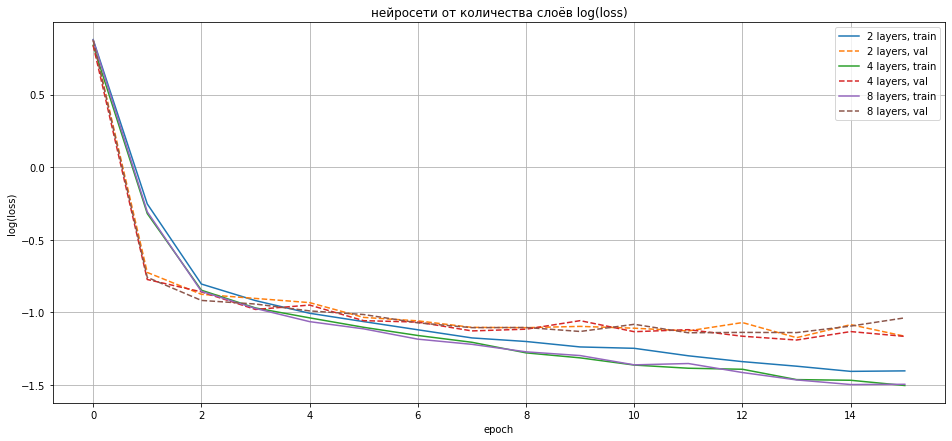

In [35]:
# создаем модели
model1 = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(220, activation='tanh'),
                      Dense(210, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
model2 = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(220, activation='tanh'),
                      Dense(210, activation='tanh'),
                      Dense(200, activation='tanh'),
                      Dense(190, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
model3 = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(220, activation='tanh'),
                      Dense(210, activation='tanh'),
                      Dense(200, activation='tanh'),
                      Dense(190, activation='tanh'),
                      Dense(180, activation='tanh'),
                      Dense(170, activation='tanh'),
                      Dense(160, activation='tanh'),
                      Dense(150, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])


# сохраняем их веса (это начальная точка) model.save_weights('model.h5')
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

i=1
# будем менять модели и смотреть результат
for i_model in [model1, model2, model3]:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = i_model
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model' + str(i) + '.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer='Adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=1024, validation_split=0.2
      )
    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = str(8 if i==3 else i * 2) +' layers, train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str(8 if i==3 else i * 2) + ' layers, val')
    i += 1
plt.legend()
plt.grid('On')

plt.title('нейросети от количества слоёв log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

### Эксперимент с разными оптимизаторами для одной начальной модели:

    создаем модель model
    сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
    создаем рабочую модель modeli куда будем загружать эти веса (она должна быть идентичной структуры)
    загружаем веса modeli.load_weights('model.h5')
    компилируем modeli с одним из оптимизаторов
    вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть
    одинаковые, но будем контролировать это и считаем каждый раз заново)
    проводим обучение модели и пишем ошибки в истории hh
    выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных

Оптимизаторы:

    SGD() (с или без моментум)
    RMSprop()
    Adam()
    Adagrad() …

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5664 - accuracy: 0.7941 - val_loss: 0.4494 - val_accuracy: 0.8310
Epoch 2/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3978 - accuracy: 0.8537 - val_loss: 0.3676 - val_accuracy: 0.8629
Epoch 3/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3532 - accuracy: 0.8690 - val_loss: 0.3645 - val_accuracy: 0.8677
Epoch 4/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3253 - accuracy: 0.8786 - val_loss: 0.3346 - val_accuracy: 0.8773
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.3050 - accuracy: 0.8858 - val_loss: 0.3643 - val_accuracy: 0.8690
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2881 - accuracy: 0.8915 - val_loss: 0.3226 - val_accuracy: 0.8779
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2733 - accuracy: 0.8972 - val_loss: 0.3208 - val_accuracy: 0.8840
Epoch 

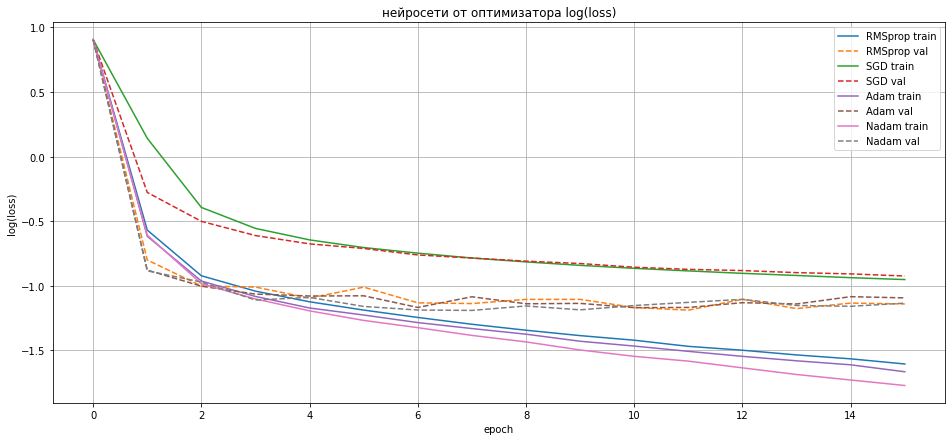

In [36]:
# создаем модель model
model = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam(),keras.optimizers.Nadam()]:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=128, validation_split=0.2
      )
    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

- более 15 эпох нет смысла брать - переобучение
- все оптимизаторы (кроме SGD) ведут себя приблизительно одинаково

Проверим максимальный уровень от оптимизатора SGD, увеличив число эпох до 100

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 1.1280 - accuracy: 0.6666 - val_loss: 0.7603 - val_accuracy: 0.7510
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6695 - accuracy: 0.7783 - val_loss: 0.6032 - val_accuracy: 0.7899
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5623 - accuracy: 0.8079 - val_loss: 0.5394 - val_accuracy: 0.8068
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5103 - accuracy: 0.8217 - val_loss: 0.5001 - val_accuracy: 0.8202
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4793 - accuracy: 0.8321 - val_loss: 0.4756 - val_accuracy: 0.8285
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.8386 - val_loss: 0.4593 - val_accuracy: 0.8345
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4425 - accuracy: 0.8417 - val_loss: 0.4439 - val_accuracy: 0.8419

Epoch 58/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2642 - accuracy: 0.9028 - val_loss: 0.3556 - val_accuracy: 0.8689
Epoch 59/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2618 - accuracy: 0.9050 - val_loss: 0.3271 - val_accuracy: 0.8816
Epoch 60/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2606 - accuracy: 0.9058 - val_loss: 0.3286 - val_accuracy: 0.8842
Epoch 61/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2584 - accuracy: 0.9053 - val_loss: 0.3237 - val_accuracy: 0.8837
Epoch 62/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2578 - accuracy: 0.9067 - val_loss: 0.3186 - val_accuracy: 0.8851
Epoch 63/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2547 - accuracy: 0.9071 - val_loss: 0.3265 - val_accuracy: 0.8814
Epoch 64/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2541 - accuracy: 0.9077 - val_loss: 0.3206 - val_accuracy:

Epoch 15/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1918 - accuracy: 0.9278 - val_loss: 0.3180 - val_accuracy: 0.8963
Epoch 16/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1868 - accuracy: 0.9302 - val_loss: 0.3355 - val_accuracy: 0.8898
Epoch 17/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1792 - accuracy: 0.9336 - val_loss: 0.3258 - val_accuracy: 0.8898
Epoch 18/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1727 - accuracy: 0.9346 - val_loss: 0.3239 - val_accuracy: 0.8918
Epoch 19/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1675 - accuracy: 0.9369 - val_loss: 0.3286 - val_accuracy: 0.8898
Epoch 20/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1622 - accuracy: 0.9390 - val_loss: 0.3256 - val_accuracy: 0.8948
Epoch 21/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1586 - accuracy: 0.9400 - val_loss: 0.3307 - val_accuracy:

Epoch 72/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0410 - accuracy: 0.9848 - val_loss: 0.5922 - val_accuracy: 0.8884
Epoch 73/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0345 - accuracy: 0.9874 - val_loss: 0.5544 - val_accuracy: 0.8925
Epoch 74/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0462 - accuracy: 0.9823 - val_loss: 0.5838 - val_accuracy: 0.8853
Epoch 75/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0355 - accuracy: 0.9873 - val_loss: 0.5572 - val_accuracy: 0.8895
Epoch 76/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0276 - accuracy: 0.9903 - val_loss: 0.5748 - val_accuracy: 0.8928
Epoch 77/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0270 - accuracy: 0.9906 - val_loss: 0.6163 - val_accuracy: 0.8855
Epoch 78/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9859 - val_loss: 0.6037 - val_accuracy:

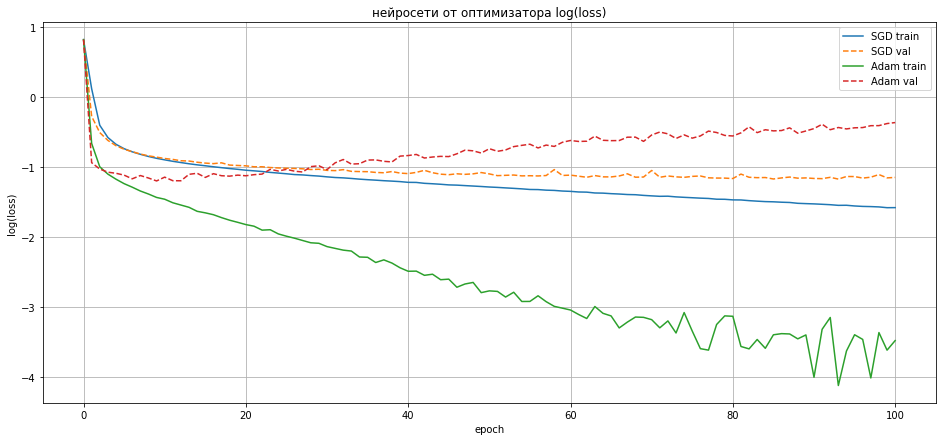

In [37]:
# создаем модель model
model = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 100
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for i_optim in [keras.optimizers.SGD( ),keras.optimizers.Adam( )]:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
      train_images,
      to_categorical(train_labels),
      epochs=epochs,
      batch_size=128, validation_split=0.2
    )
    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

при увеличении количества эпох оптимизатор Adam 10 эпох показывает результат лучше чем SGD 100 эпох.
Вывод: для экономии в вычисления на порядок лучше использовать Adam, Nadam и им подобные

Теперь рассмотрим тоже самое, но привыборе разных функций потерь:

Epoch 1/15
375/375 [==============================] - 2s 4ms/step - loss: 0.5274 - accuracy: 0.8111 - val_loss: 0.4372 - val_accuracy: 0.8409
Epoch 2/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8630 - val_loss: 0.3816 - val_accuracy: 0.8602
Epoch 3/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8765 - val_loss: 0.3443 - val_accuracy: 0.8746
Epoch 4/15
375/375 [==============================] - 1s 3ms/step - loss: 0.3134 - accuracy: 0.8835 - val_loss: 0.3239 - val_accuracy: 0.8809
Epoch 5/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2952 - accuracy: 0.8900 - val_loss: 0.3378 - val_accuracy: 0.8802
Epoch 6/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2774 - accuracy: 0.8977 - val_loss: 0.3181 - val_accuracy: 0.8861
Epoch 7/15
375/375 [==============================] - 1s 4ms/step - loss: 0.2667 - accuracy: 0.9011 - val_loss: 0.3232 - val_accuracy: 0.8795
Epoch 

/usr/lib/python3/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in log
/usr/lib/python3/dist-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in log


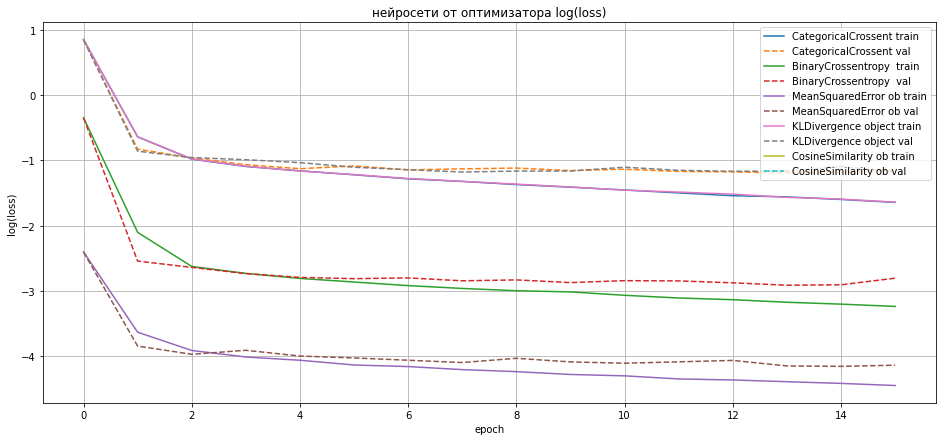

In [38]:
# создаем модель model
model = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы
for loss_optim in [#keras.losses.SparseCategoricalCrossentropy(),
                keras.losses.CategoricalCrossentropy(),\
                keras.losses.BinaryCrossentropy(),\
                keras.losses.MeanSquaredError(),\
                keras.losses.KLDivergence(),\
                keras.losses.CosineSimilarity()]:
    # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(128, activation='relu', input_shape=(784,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer='Adam',
      loss=loss_optim,
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    hh0_tr = modeli.evaluate(train_images[:48000,:], to_categorical(train_labels[:48000]),verbose = 0)
    hh0_val = modeli.evaluate(train_images[48000:,:], to_categorical(train_labels[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
        train_images,
        to_categorical(train_labels),
        epochs=epochs,
        batch_size=128, validation_split=0.2
    )
    # картинки
    plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = str(loss_optim)[14:33] + ' train')
    plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = str(loss_optim)[14:33] +' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [ ]:
какя-то ошибка.